Maurice S Gleiser - 1218016033 <br>
Zachary Guccione - 1216664514 <br>
Javier Sayles - 1219966124 <br>
Tom Duecker <br>
Nora Mawashi<br>

# 1. Pseudo-Code
<B> This is our 591 Sock selling campaign </b> <br>
<br>
<B> **Data we are going to look at** </B>
* Impressions
* Clicks
* Campaign
* Conversions
* Budget
* Channel

**Data Columns:**
- Impressions (int): The number of times an ad or campaign was shown.
- Clicks (int): The number of times an ad or link was clicked.
- Campaign (str): The name of the marketing campaign.
- Conversions (int): The number of desired actions (e.g., purchases or signups).
- Budget (float): The total amount spent on the campaign.
- Channel (str): The platform where the campaign was run (e.g., Facebook, Google, Email).

- **Load or generate a dataset with the above columns**.

**For each campaign and channel:**
- Click-Through Rate (CTR) = (Clicks / Impressions) * 100
- Conversion Rate (CR) = (Conversions / Clicks) * 100
- Cost per Click (CPC) = Budget / Clicks
- Cost per Conversion (CPA) = Budget / Conversions
- Return on Investment (ROI) = (Revenue - Budget) / Budget

- Group data by campaign and channel.
- Calculate aggregated metrics (total impressions, total clicks, total conversions, total budget).

- Sort campaigns by highest conversion rate, lowest cost per conversion, or highest ROI.

- Create bar charts for CTR, CR, and CPC across different campaigns and channels.
- Create scatter plots to show relationships between budget, clicks, and conversions.

- Identify high-performing channels or campaigns based on key metrics.
- Provide optimization recommendations (e.g., allocate more budget to high-ROI campaigns, improve low-CTR campaigns).



https://chatgpt.com/g/g-otXqsL6AT-marketing-analyst-gpt

In [ ]:
### CREATE DATA

import pandas as pd

# Sample data representing marketing campaign performance
data = {
    'Channel': ['Social Media', 'Email', 'SEO', 'Social Media', 'Email', 'SEO', 'Social Media', 'SEO'],
    'Impressions': [50000, 30000, 40000, 60000, 35000, 45000, 50000, 100000],
    'Clicks': [500, 300, 400, 600, 350, 450, 650, 120],
    'Conversions': [50, 30, 40, 60, 35, 45, 100, 20],
    'Budget': [1000, 800, 1200, 1100, 900, 1300, 800, 1600]
}

# Creating DataFrame
df = pd.DataFrame(data)

# View the DataFrame
print(df)

        Channel  Impressions  Clicks  Conversions  Budget
0  Social Media        50000     500           50    1000
1         Email        30000     300           30     800
2           SEO        40000     400           40    1200
3  Social Media        60000     600           60    1100
4         Email        35000     350           35     900
5           SEO        45000     450           45    1300
6  Social Media        50000     650          100     800
7           SEO       100000     120           20    1600


In [ ]:
### CALCULATIONS

# Calculate Conversion Rate (Conversions / Clicks)
df['Conversion Rate'] = df['Conversions'] / df['Clicks'] * 100
df['Conversion Rate'] = round(df['Conversion Rate'],2)

# Calculate Click-Through Rate (Clicks / Impressions)
df['Click-Through Rate'] = df['Clicks'] / df['Impressions'] * 100

# Calculate Cost per Conversion (Budget / Conversions)
df['Cost per Conversion'] = df['Budget'] / df['Conversions']
df['Cost per Conversion'] = round(df['Cost per Conversion'],2)

# View the DataFrame with calculated metrics
print(df[['Channel', 'Conversion Rate', 'Click-Through Rate', 'Cost per Conversion']])

        Channel  Conversion Rate  Click-Through Rate  Cost per Conversion
0  Social Media            10.00                1.00                20.00
1         Email            10.00                1.00                26.67
2           SEO            10.00                1.00                30.00
3  Social Media            10.00                1.00                18.33
4         Email            10.00                1.00                25.71
5           SEO            10.00                1.00                28.89
6  Social Media            15.38                1.30                 8.00
7           SEO            16.67                0.12                80.00


In [ ]:
### CONTROL FLOW & CONDITIONAL LOGIC

# Flag campaigns with low conversion rate (< 0.1) or high cost per conversion (> 30)
df['Performance Flag'] = df.apply(
    lambda row: 'Underperforming' if row['Conversion Rate'] < 0.1 or row['Cost per Conversion'] > 27 else 'Performing Well', axis=1
)

# View the DataFrame with performance flags
print(df[['Channel', 'Conversion Rate', 'Cost per Conversion', 'Performance Flag']])

        Channel  Conversion Rate  Cost per Conversion Performance Flag
0  Social Media            10.00                20.00  Performing Well
1         Email            10.00                26.67  Performing Well
2           SEO            10.00                30.00  Underperforming
3  Social Media            10.00                18.33  Performing Well
4         Email            10.00                25.71  Performing Well
5           SEO            10.00                28.89  Underperforming
6  Social Media            15.38                 8.00  Performing Well
7           SEO            16.67                80.00  Underperforming


In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

### CALCULATIONS ###

# Conversion Rate (Conversions / Clicks)
df['Conversion Rate'] = df['Conversions'] / df['Clicks'] * 100

# Click-Through Rate (Clicks / Impressions)
df['Click-Through Rate'] = df['Clicks'] / df['Impressions'] * 100

# Cost per Conversion (Budget / Conversions)
df['Cost per Conversion'] = df['Budget'] / df['Conversions']

### CONTROL FLOW ###

# Custom function to flag campaigns
def performance_flag(row):
    if row['Conversion Rate'] < 10 or row['Cost per Conversion'] > 30:
        return 'Underperforming'
    else:
        return 'Performing Well'

# Apply the function to each row
df['Performance Flag'] = df.apply(performance_flag, axis=1)

# View the DataFrame with performance flags
print(df[['Channel', 'Conversion Rate', 'Cost per Conversion', 'Performance Flag']])

# Group by Channel to see aggregated performance statistics
channel_summary = df.groupby('Channel').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Budget': 'sum',
    'Conversion Rate': 'mean',
    'Click-Through Rate': 'mean',
    'Cost per Conversion': 'mean'
}).reset_index()

print("\nAggregated Channel Summary:")
print(channel_summary)

# Show the campaigns flagged as Underperforming
underperforming = df[df['Performance Flag'] == 'Underperforming']
print("\nUnderperforming Campaigns:")
print(underperforming[['Channel', 'Conversion Rate', 'Cost per Conversion', 'Performance Flag']])

        Channel  Conversion Rate  Cost per Conversion Performance Flag
0  Social Media        10.000000            20.000000  Performing Well
1         Email        10.000000            26.666667  Performing Well
2           SEO        10.000000            30.000000  Performing Well
3  Social Media        10.000000            18.333333  Performing Well
4         Email        10.000000            25.714286  Performing Well
5           SEO        10.000000            28.888889  Performing Well
6  Social Media        15.384615             8.000000  Performing Well
7           SEO        16.666667            80.000000  Underperforming

Aggregated Channel Summary:
        Channel  Impressions  Clicks  Conversions  Budget  Conversion Rate  \
0         Email        65000     650           65    1700        10.000000   
1           SEO       185000     970          105    4100        12.222222   
2  Social Media       160000    1750          210    2900        11.794872   

   Click-Through Ra

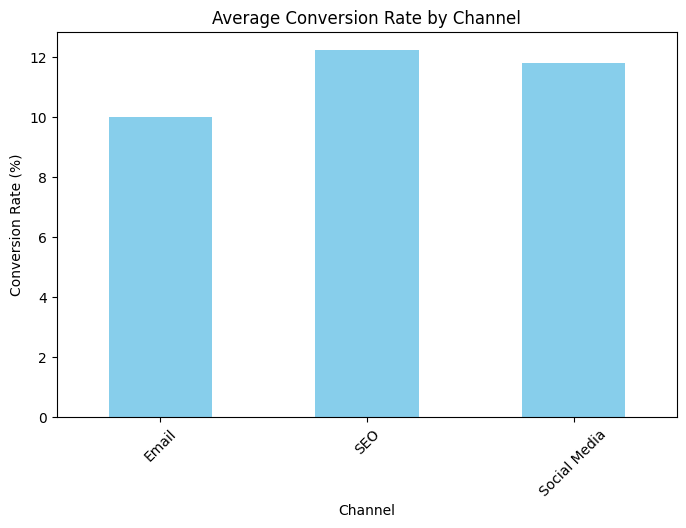

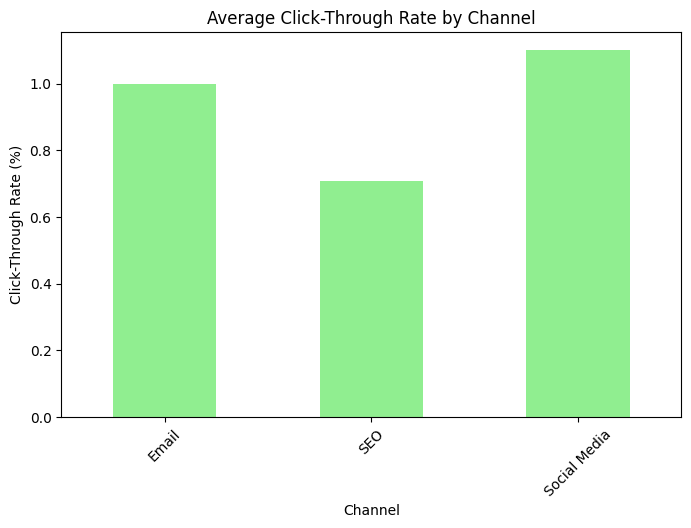

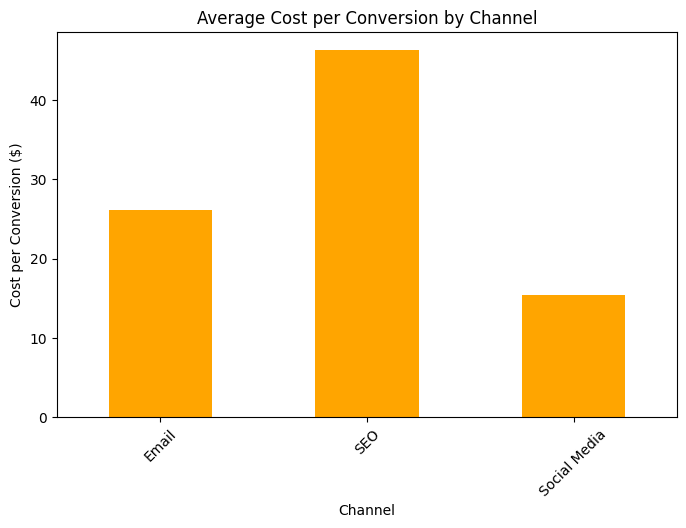

In [ ]:
import matplotlib.pyplot as plt

# Plot Conversion Rate by Channel
df.groupby('Channel')['Conversion Rate'].mean().plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Average Conversion Rate by Channel')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Plot Click-Through Rate by Channel
df.groupby('Channel')['Click-Through Rate'].mean().plot(kind='bar', color='lightgreen', figsize=(8, 5))
plt.title('Average Click-Through Rate by Channel')
plt.ylabel('Click-Through Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Plot Cost per Conversion by Channel
df.groupby('Channel')['Cost per Conversion'].mean().plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Average Cost per Conversion by Channel')
plt.ylabel('Cost per Conversion ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

# Interactive Bar Chart for Average Conversion Rate by Channel
fig = px.bar(
    channel_summary,
    x='Channel',
    y='Conversion Rate',
    title="Average Conversion Rate by Channel",
    color='Conversion Rate',
    text='Conversion Rate',
    color_continuous_scale='purd'  # Set color scale to green
)
fig.show()

# Interactive Scatter Plot for Budget vs Conversions
fig = px.scatter(df, x='Budget', y='Conversions', color='Channel', size='Click-Through Rate', hover_data=['Cost per Conversion'],
                 title='Budget vs Conversions with CTR Size', color_continuous_scale='purd')
fig.show()

In [ ]:

summary_text = f"""
Our analysis of the marketing campaign data reveals some key insights.
-- Social media appears to be the most effective channel with a high average conversion rate, although its cost per conversion is relatively high.
--Email marketing shows a moderate conversion rate and cost per conversion.
--SEO, while having a lower conversion rate, demonstrates a lower cost per conversion, suggesting it might be more budget-efficient.
We identified some underperforming campaigns based on low conversion rates or high cost per conversions.
Further analysis and optimization efforts should focus on improving the performance of these campaigns and exploring ways to enhance the efficiency of social media campaigns.
"""

print(summary_text)



Our analysis of the marketing campaign data reveals some key insights. 
-- Social media appears to be the most effective channel with a high average conversion rate, although its cost per conversion is relatively high. 
--Email marketing shows a moderate conversion rate and cost per conversion. 
--SEO, while having a lower conversion rate, demonstrates a lower cost per conversion, suggesting it might be more budget-efficient. 
We identified some underperforming campaigns based on low conversion rates or high cost per conversions. 
Further analysis and optimization efforts should focus on improving the performance of these campaigns and exploring ways to enhance the efficiency of social media campaigns.

